In [1]:
include("./sim_frame.jl");
using ProgressMeter, LsqFit, GLM

In [4]:
N=100;
M=50;
L = 0.3;
### Temp params 
num_temps = 38;
Tr=273.15+10; Ed=3.5;

In [5]:
Temp_rich = range(0, num_temps-1, length = num_temps);
k = 0.0000862 # Boltzman constant
x = -1/k .* (1 ./(Temp_rich .+273.15) .- 1/Tr);
temp = collect(Temp_rich .+273.15);
temp_SS(T, params) = params[1] .* exp.((-params[2]./k) * ((1 ./T) .-(1/Tr)))./(1 .+ (params[2]./(params[4] .- params[2])) .* exp.(params[4]/k * (1 ./params[3] .- 1 ./T)));

In [6]:
countnonmiss(vec) = count(x -> !ismissing(x), vec)
function get_init_param(αs, nt)
    k = 0.0000862; Tr = 273.15+10
    Temp_rich = range(0, nt-1, length = nt)
    x = -1/k .* (1 ./(Temp_rich .+273.15) .- 1/Tr)
    α = [mean(log.(abs.(αs[t]))) for t in 1:nt]
    Nα = sum(countnonmiss.(αs))
    T_m = Temp_rich[argmax(α)]
    B_m = α[Int(Tr-273.15+1)]
    clean = α[.!ismissing.(α)]
    x_c = x[.!ismissing.(α)]
    E_up = maximum(diff(clean)./diff(x_c))
    E_mean = mean(diff(clean)./diff(x_c))
    temp = collect(Temp_rich .+273.15)

    allα = abs.(vcat(αs...))
    nm_index = .!ismissing.(allα)
    temp_all = vcat([repeat([temp[t]], length(αs[t])) for t in 1:nt]...)
    temp_all = temp_all[nm_index]
    allα = allα[nm_index]
    return Nα, B_m, E_up, T_m, temp_all, allα
end 

get_init_param (generic function with 1 method)

# $\rho = -1$

In [2]:
@load "../data/1com-1.jld2" all_ℵii all_ℵij all_up_ℵij all_low_ℵij all_ℵij_sum all_D_ℵij all_ℵii_sur all_ℵij_sur all_up_ℵij_sur all_low_ℵij_sur all_ℵij_sum_sur all_D_ℵij_sur;
D = (all_ℵii = all_ℵii, all_ℵij = all_ℵij, all_up_ℵij = all_up_ℵij,all_low_ℵij = all_low_ℵij, all_ℵij_sum= all_ℵij_sum, all_D_ℵij = all_D_ℵij,
    all_ℵii_sur = all_ℵii_sur,  all_ℵij_sur = all_ℵij_sur, all_up_ℵij_sur = all_up_ℵij_sur, all_low_ℵij_sur = all_low_ℵij_sur, all_ℵij_sum_sur = all_ℵij_sum_sur, all_D_ℵij_sur = all_D_ℵij_sur);
Dnames = ("αii", "αij", "up_αij", "low_αij", "sum_αij", "up_low", "αii_sur", "αij_sur", "up_αij_sur", "low_αij_sur", "sum_αij_sur", "up_low_sur");


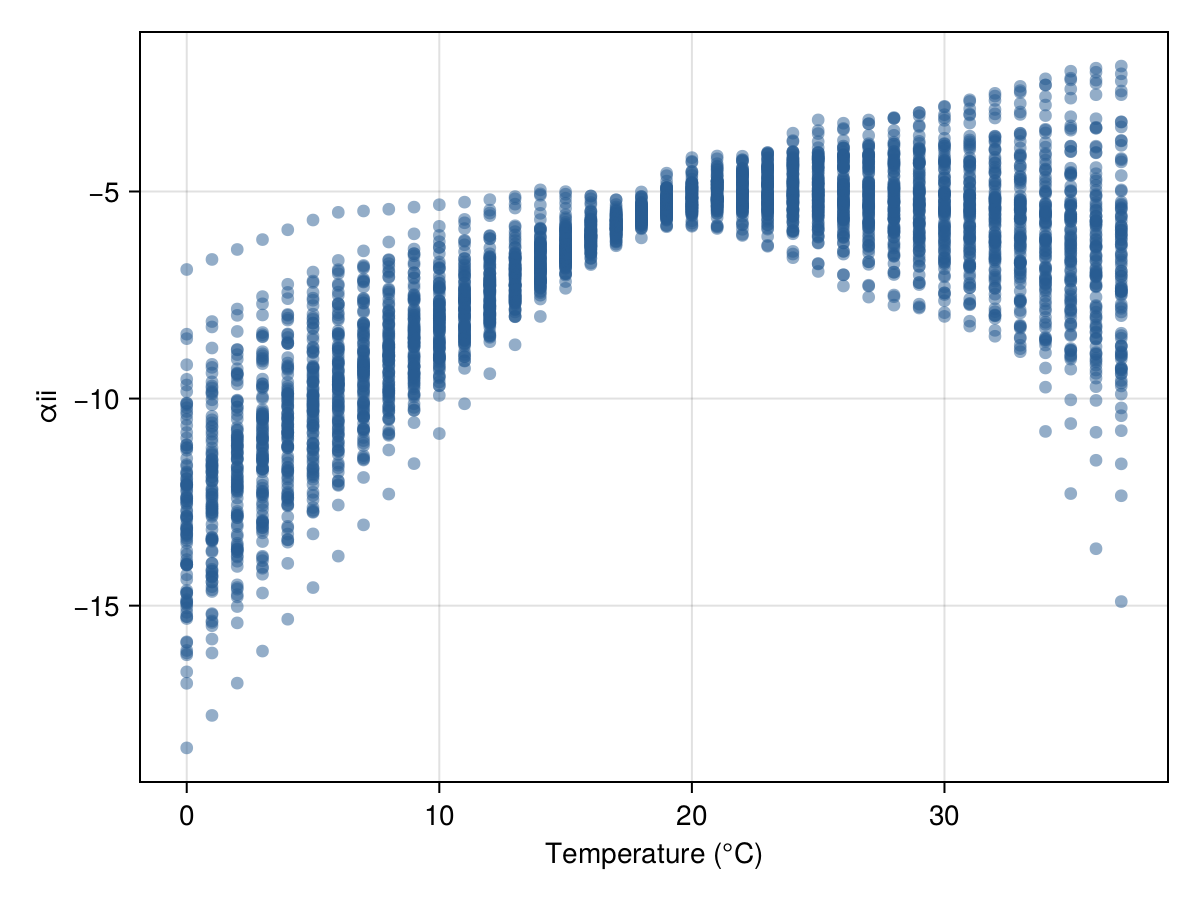

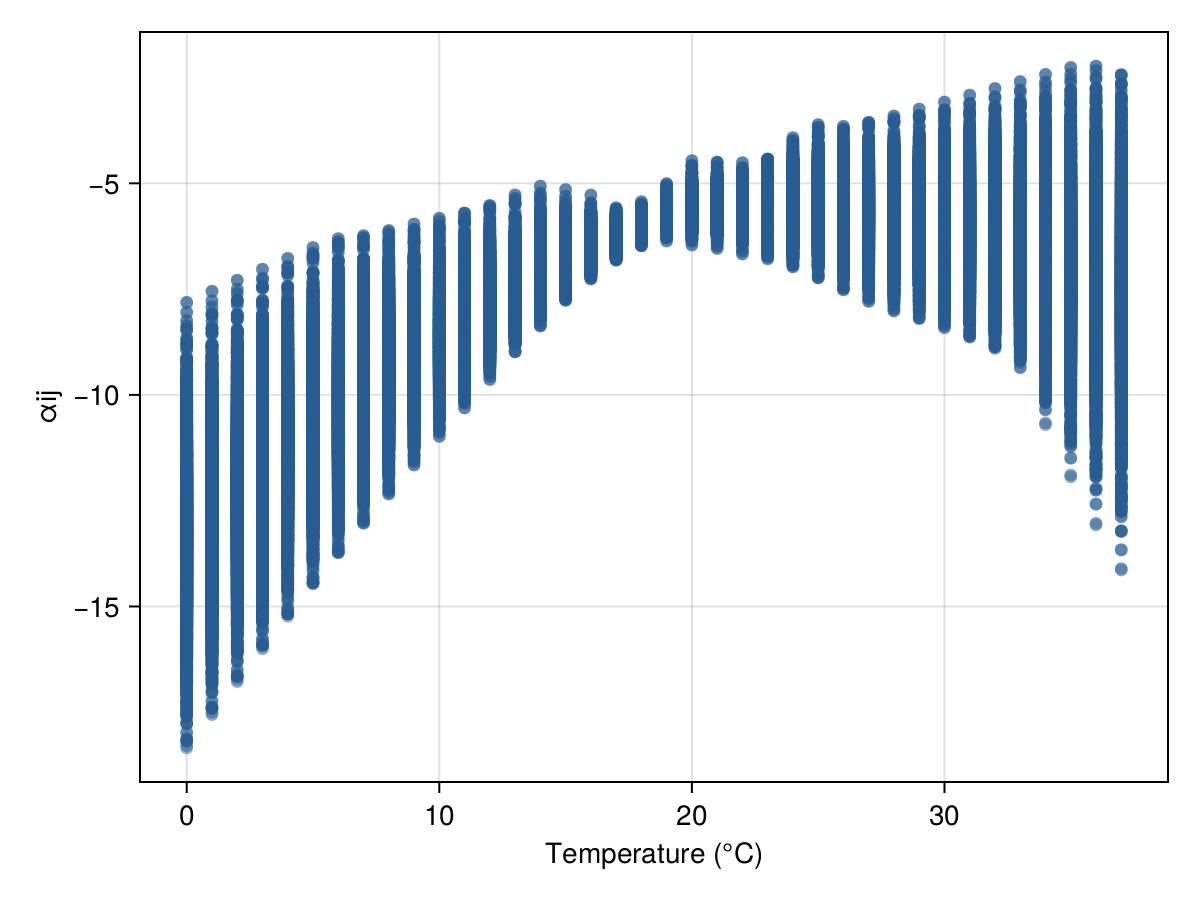

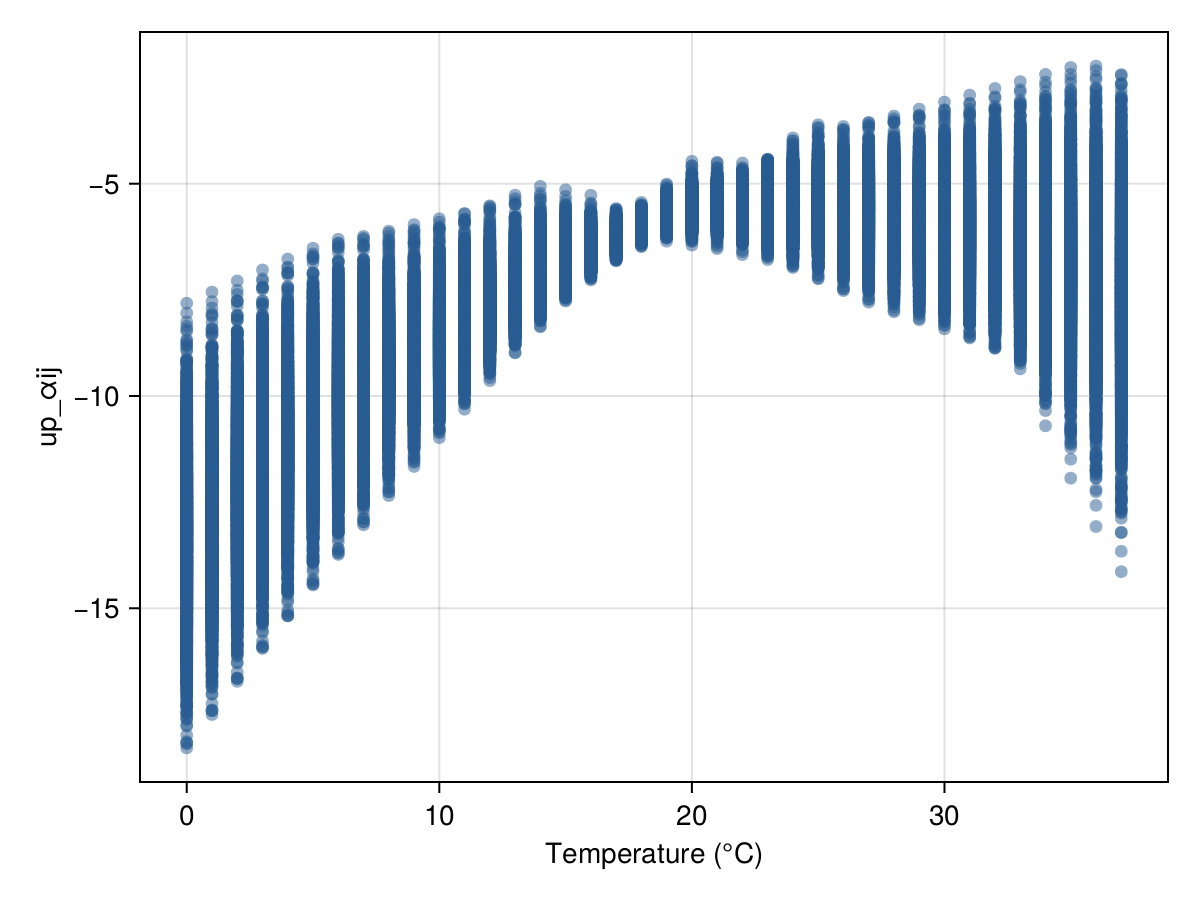

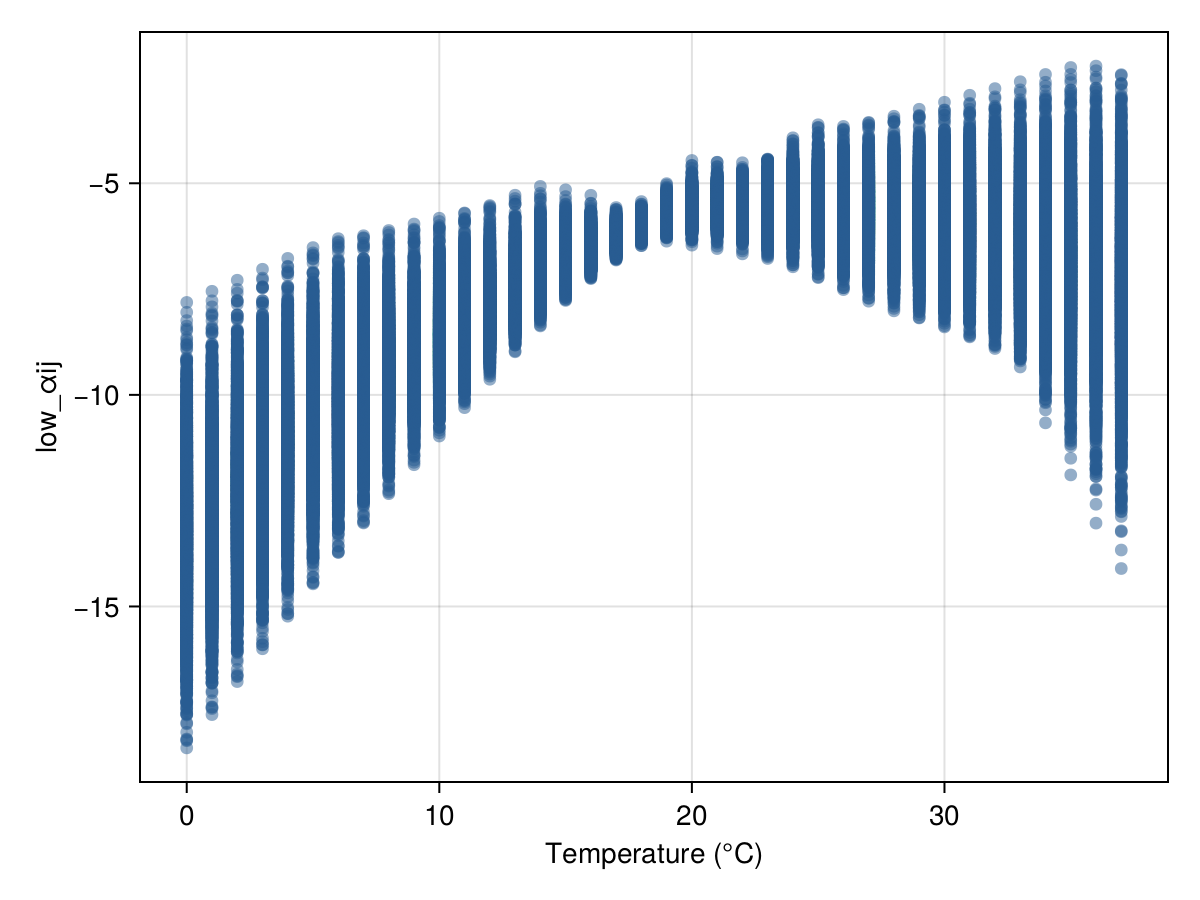

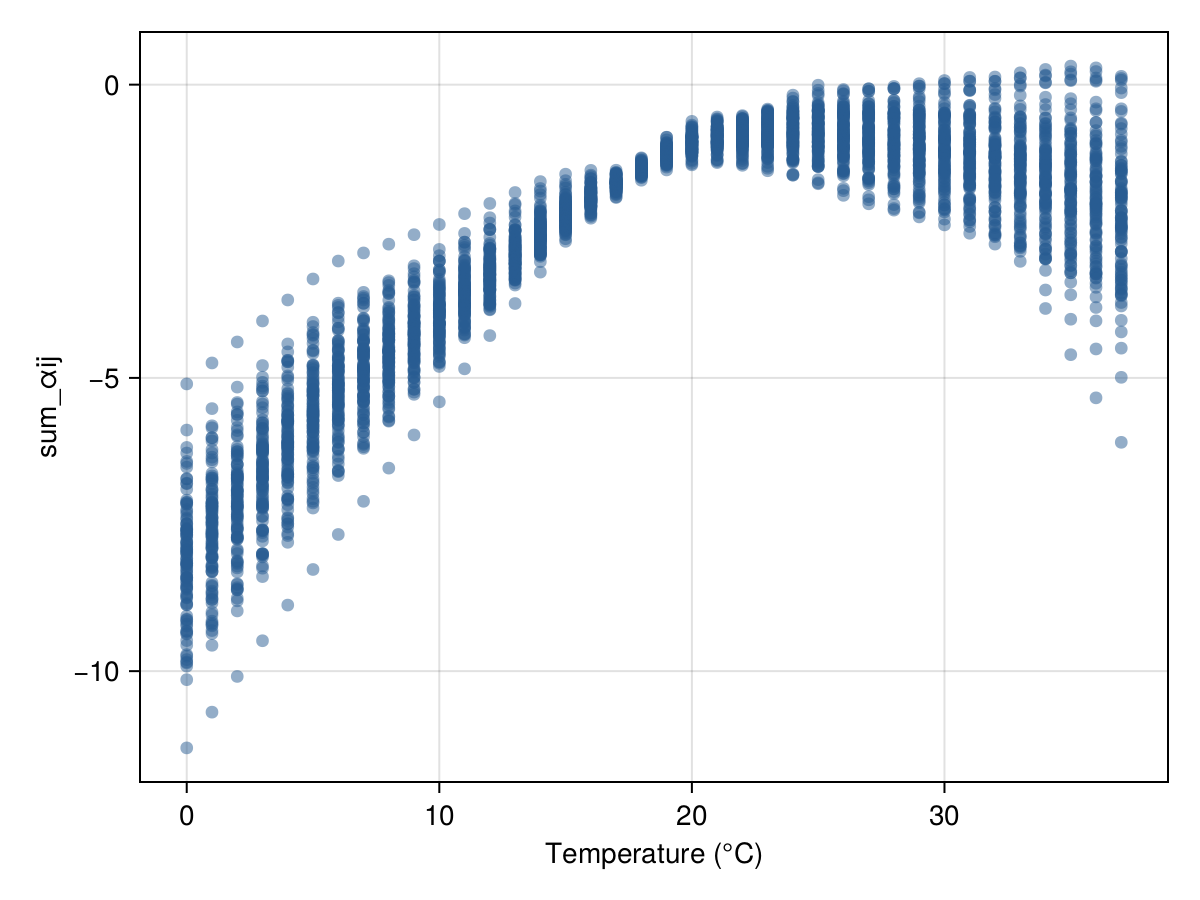

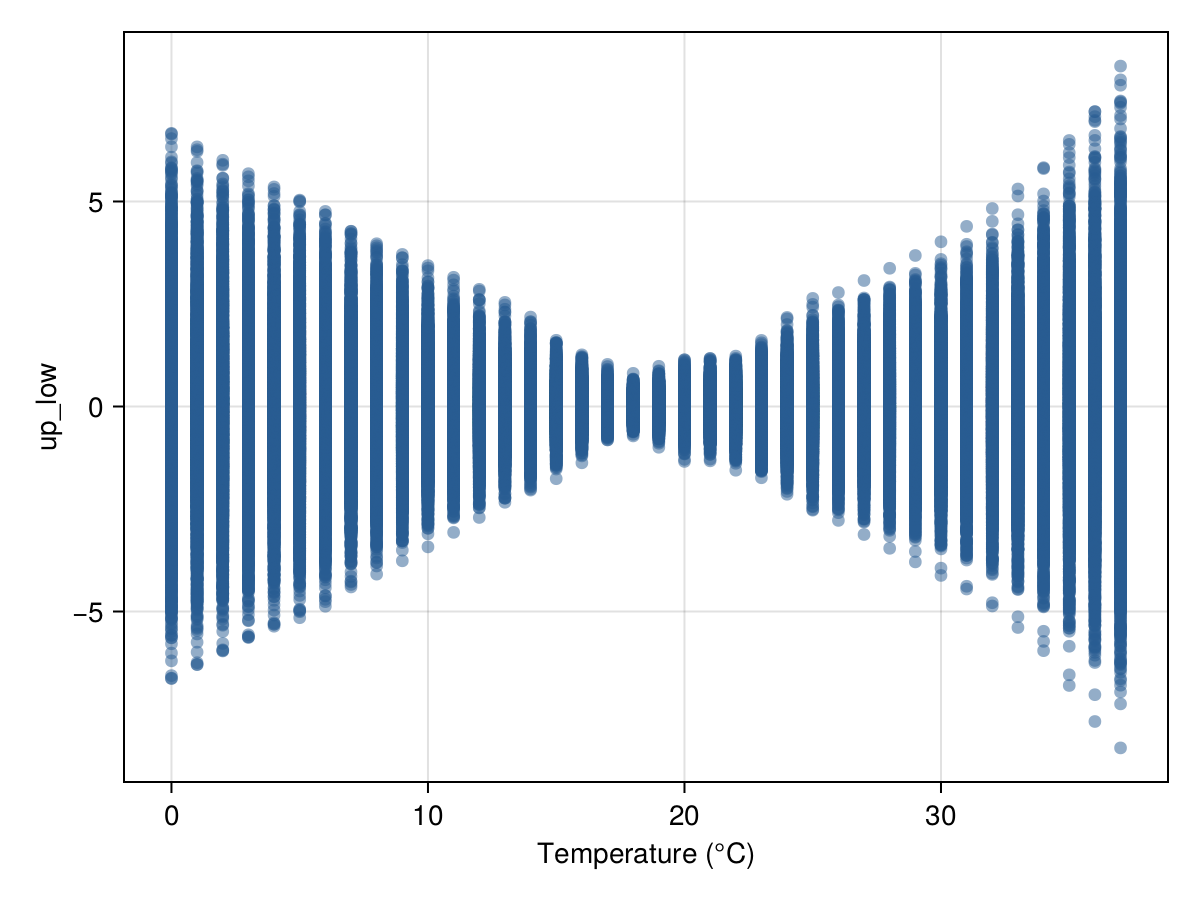

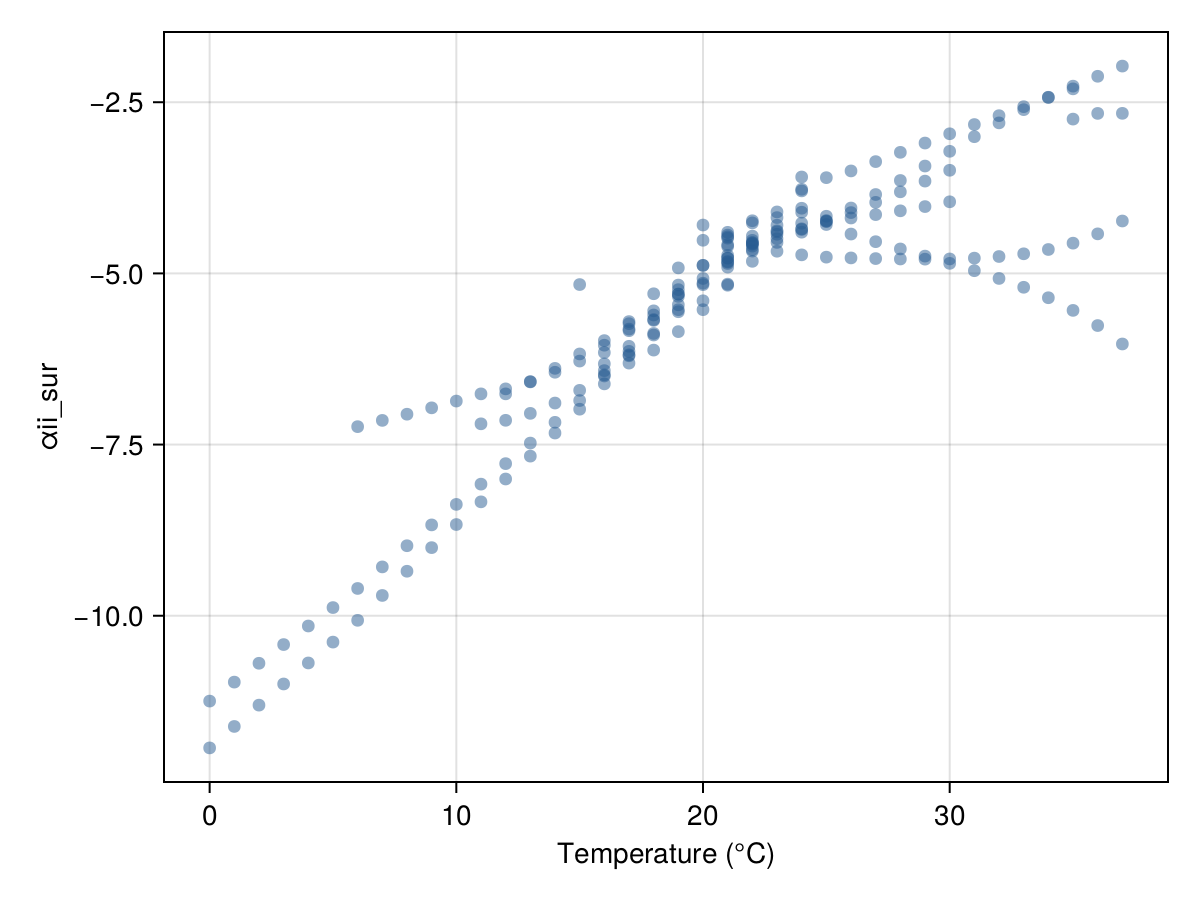

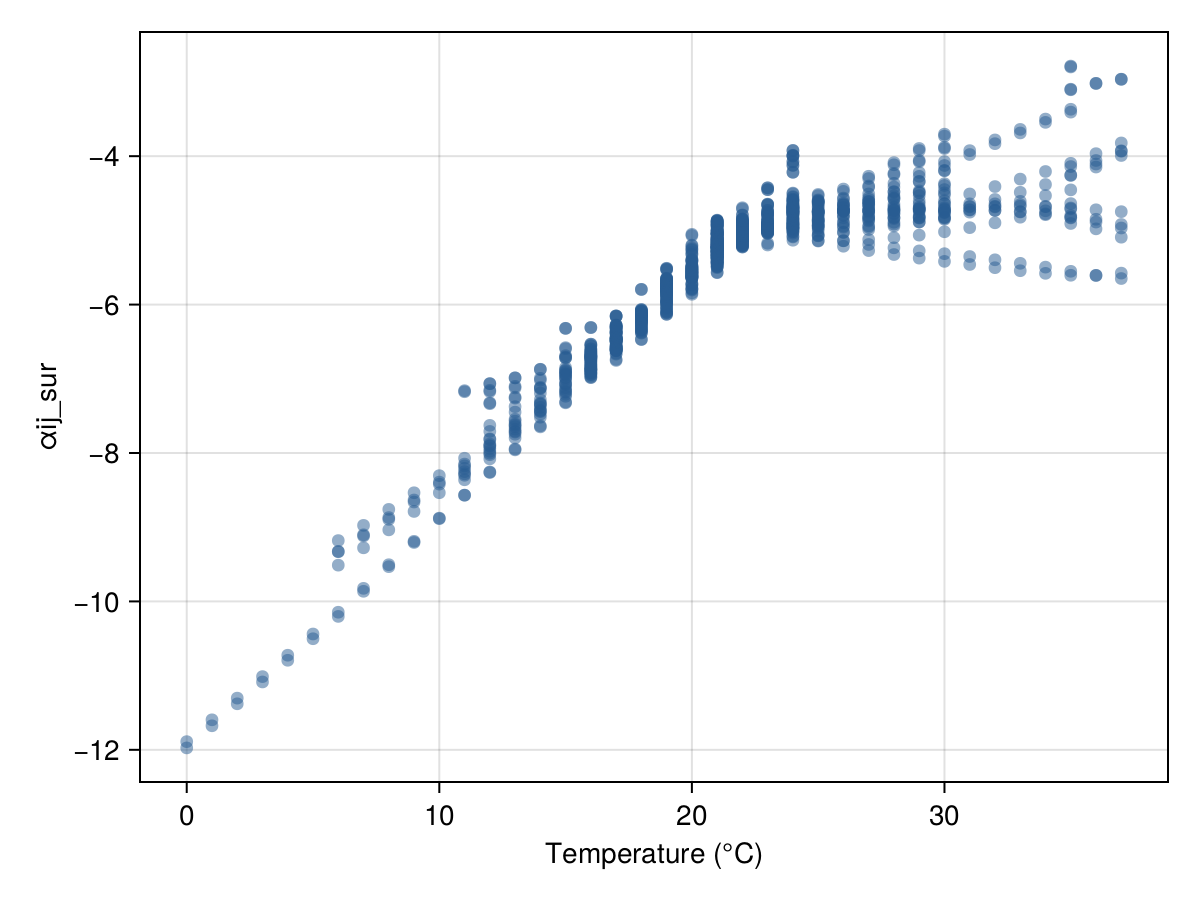

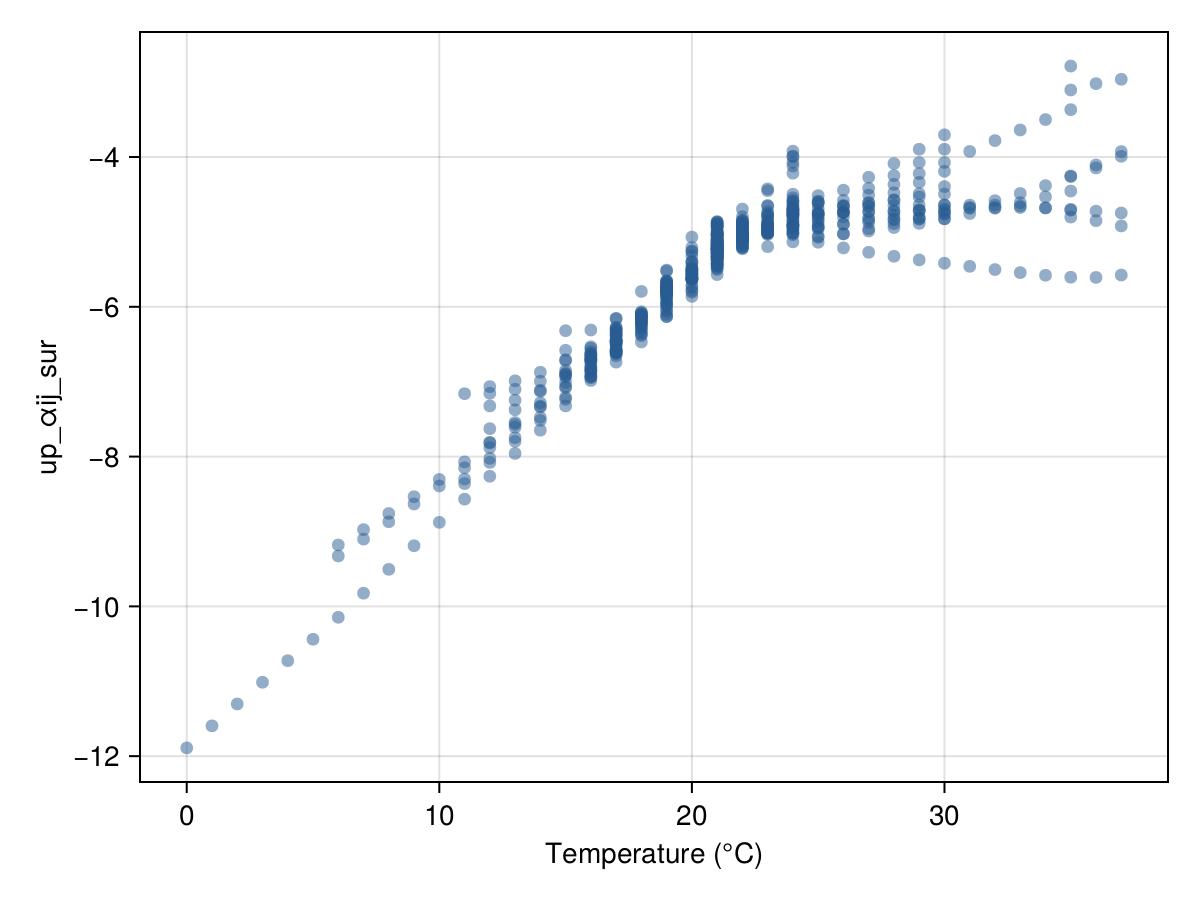

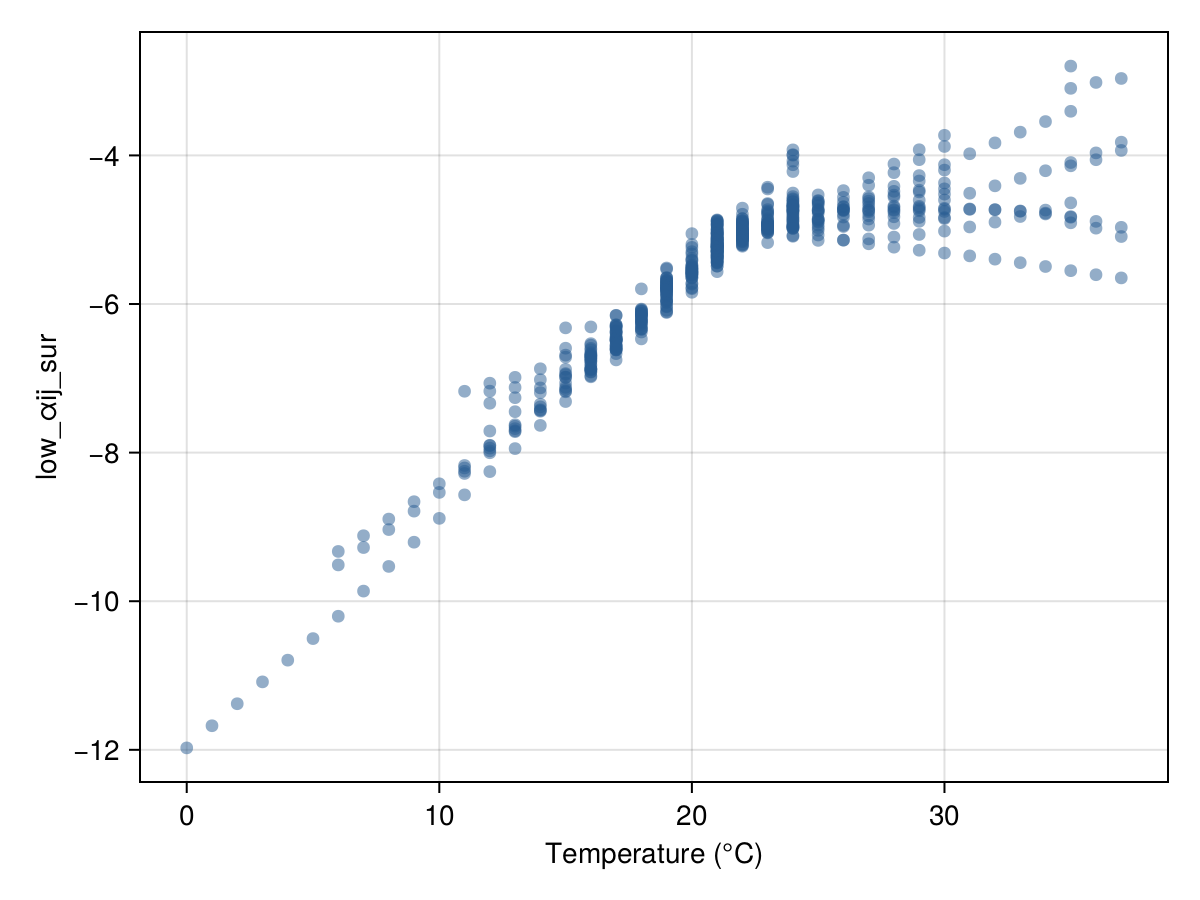

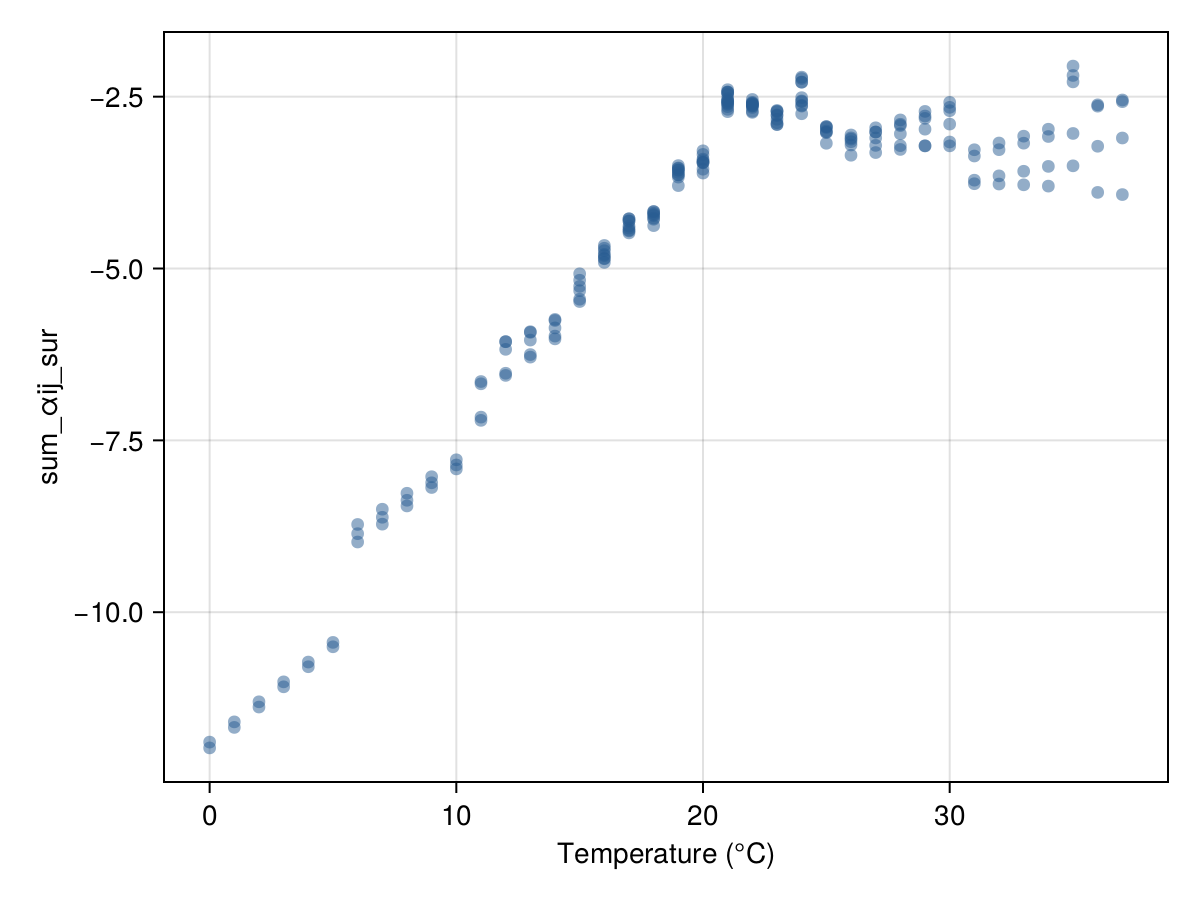

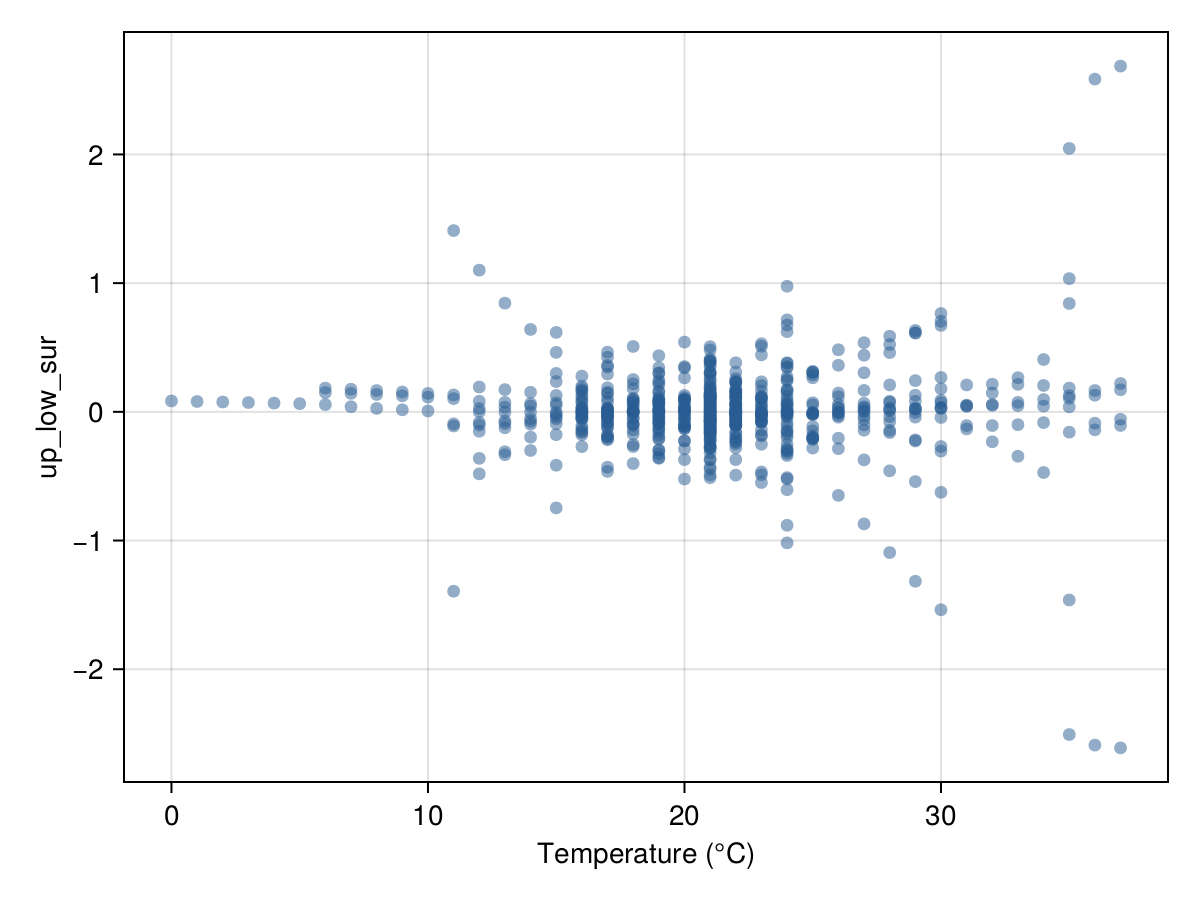

In [7]:
progress = Progress(length(D); desc="Progress running:")
for fn in 1:length(D)
    f = Figure()
    ax = Axis(f[1,1], xlabel = "Temperature (°C)", ylabel = "$(Dnames[fn])")
    Nα, B_m, E_up, T_m, temp_all, allα = get_init_param(D[fn], num_temps)
    scatter!(ax, temp_all.-273.15, log.(abs.(allα)), color = "#285C93", alpha = 0.5)
    display(f)
end

$\alpha_{ii}$

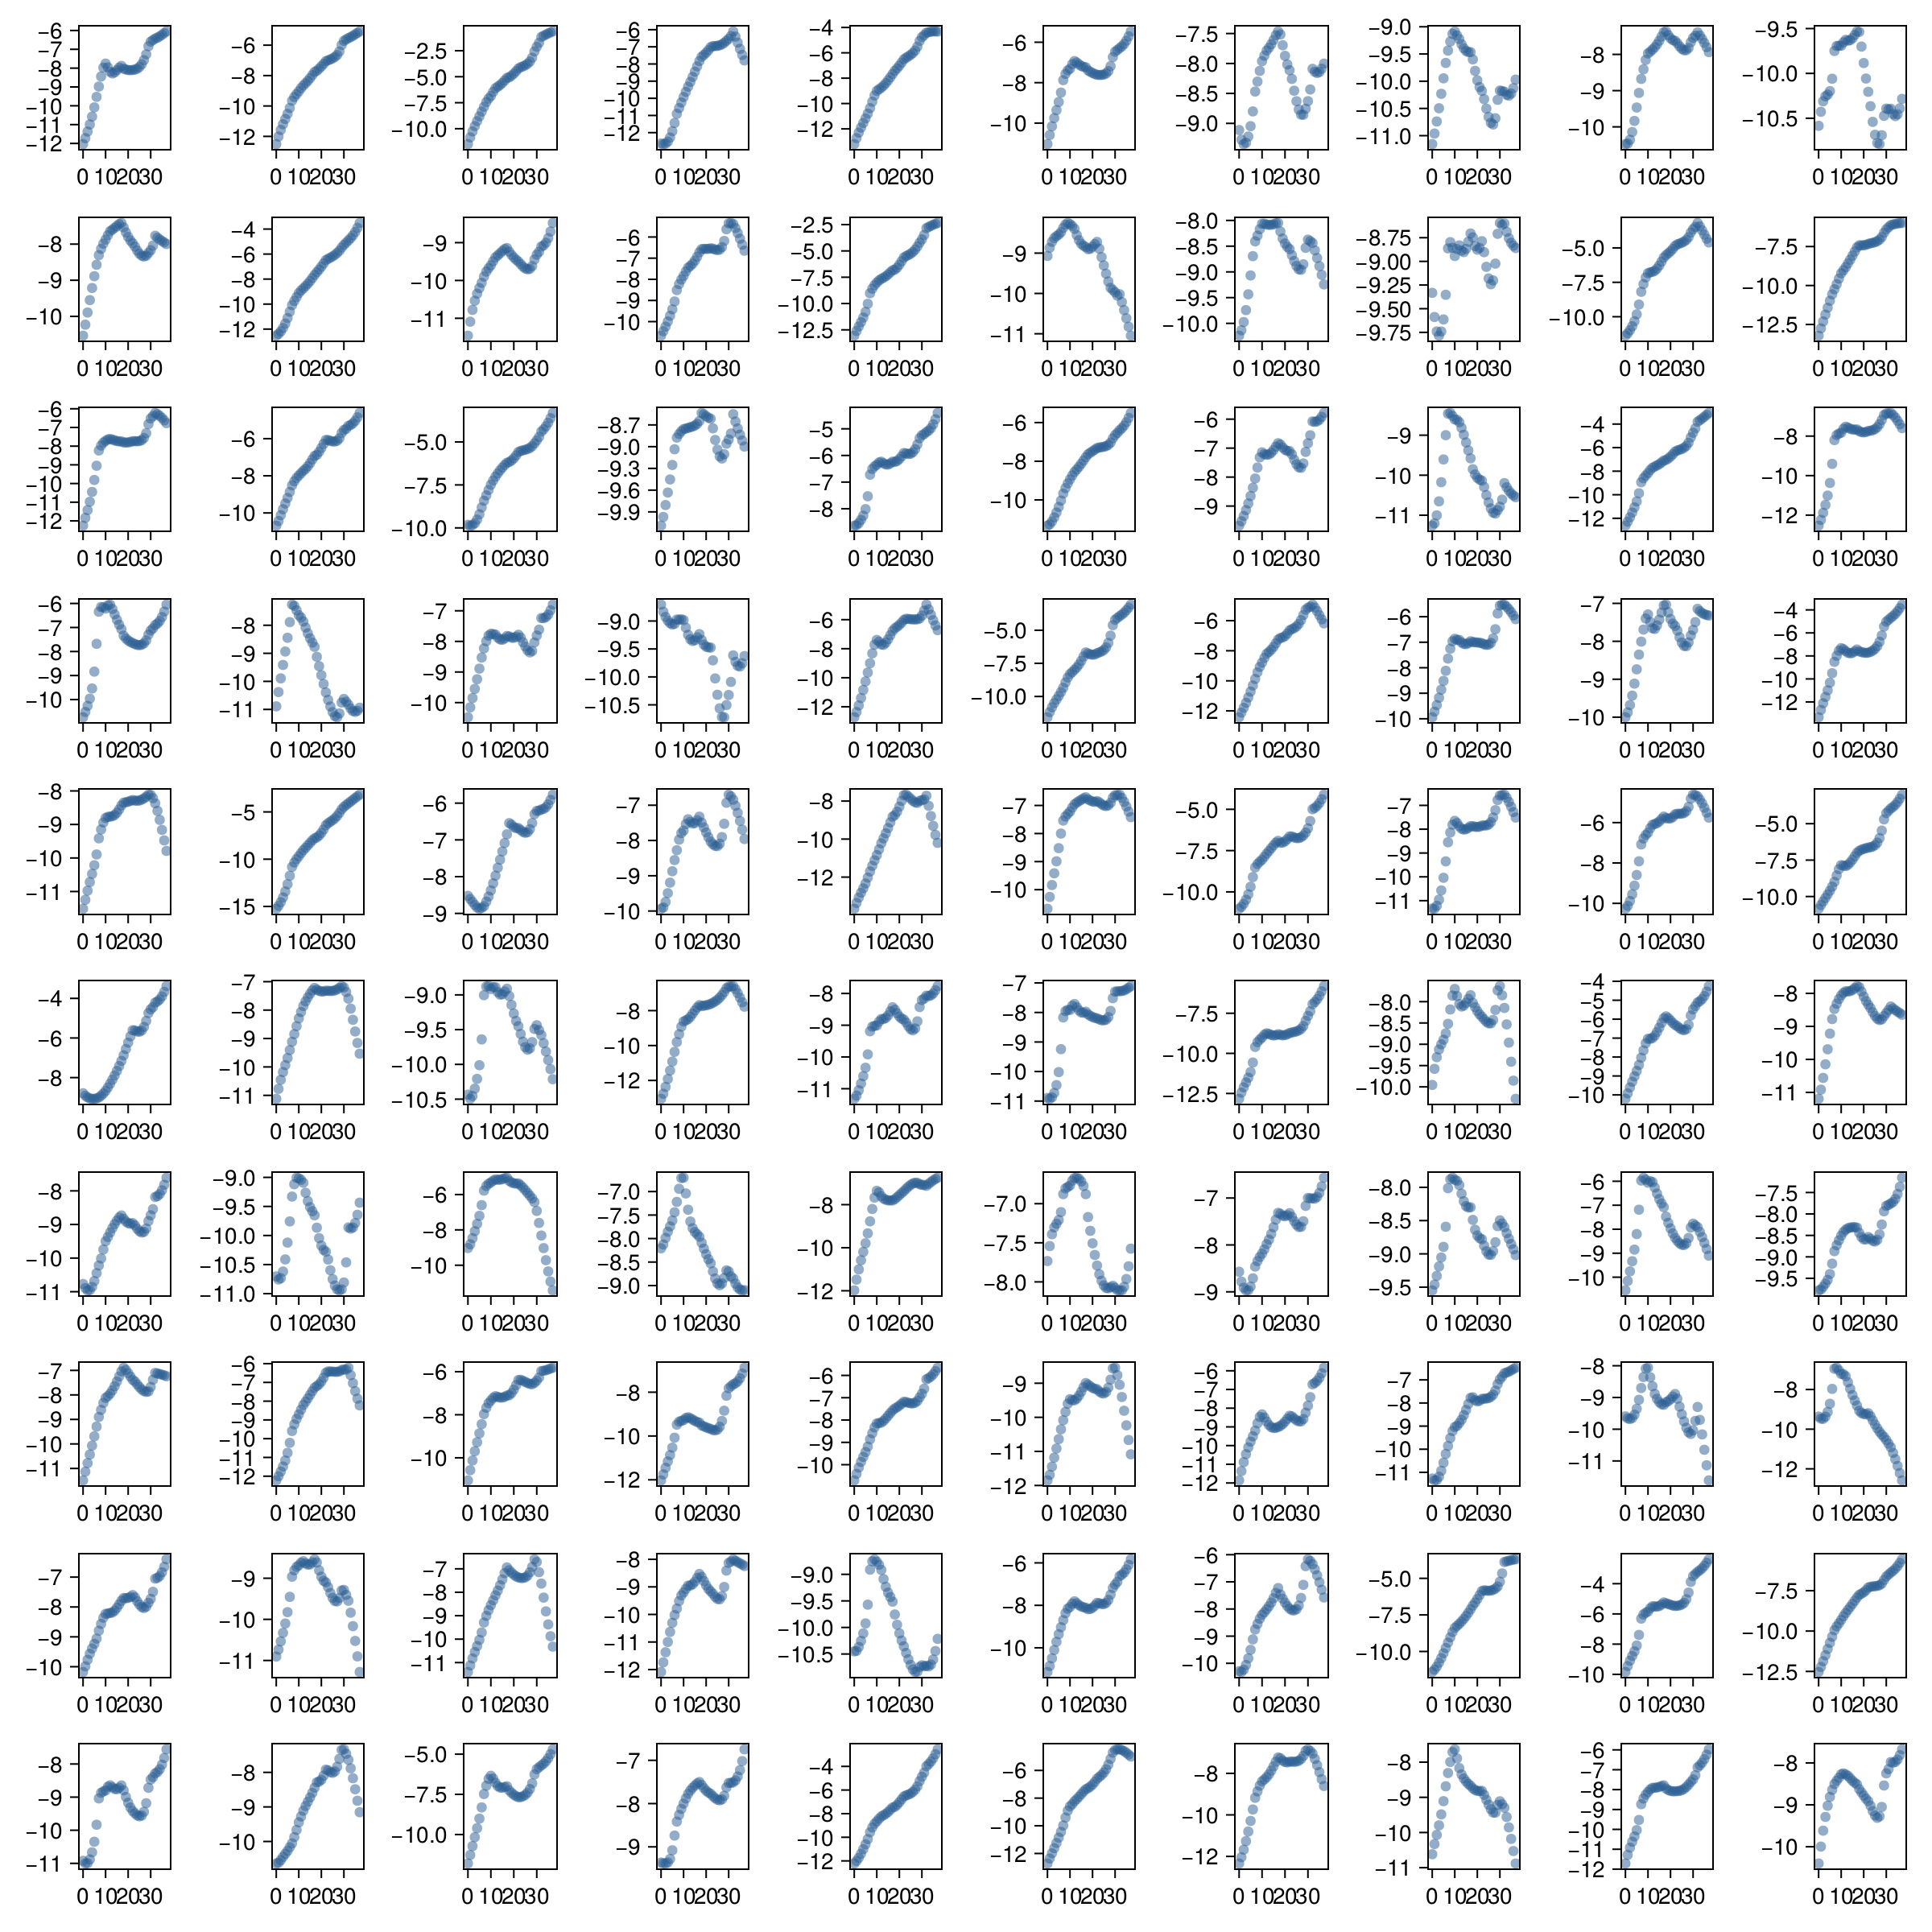

In [16]:
f1 = Figure(size = (1200, 1200));
for i in 1:N 
    αii = [all_ℵii[t][i] for t in 1:num_temps]
    ax1 = Axis(f1[Int(floor((i-1)/10+1)),Int((i-1) % 10+1)], ygridvisible = false, xgridvisible = false)
    scatter!(ax1, Temp_rich, log.(abs.(αii)), color = "#285C93", alpha = 0.5)
end 
display(f1);

$\sum_j \alpha_{ij}$

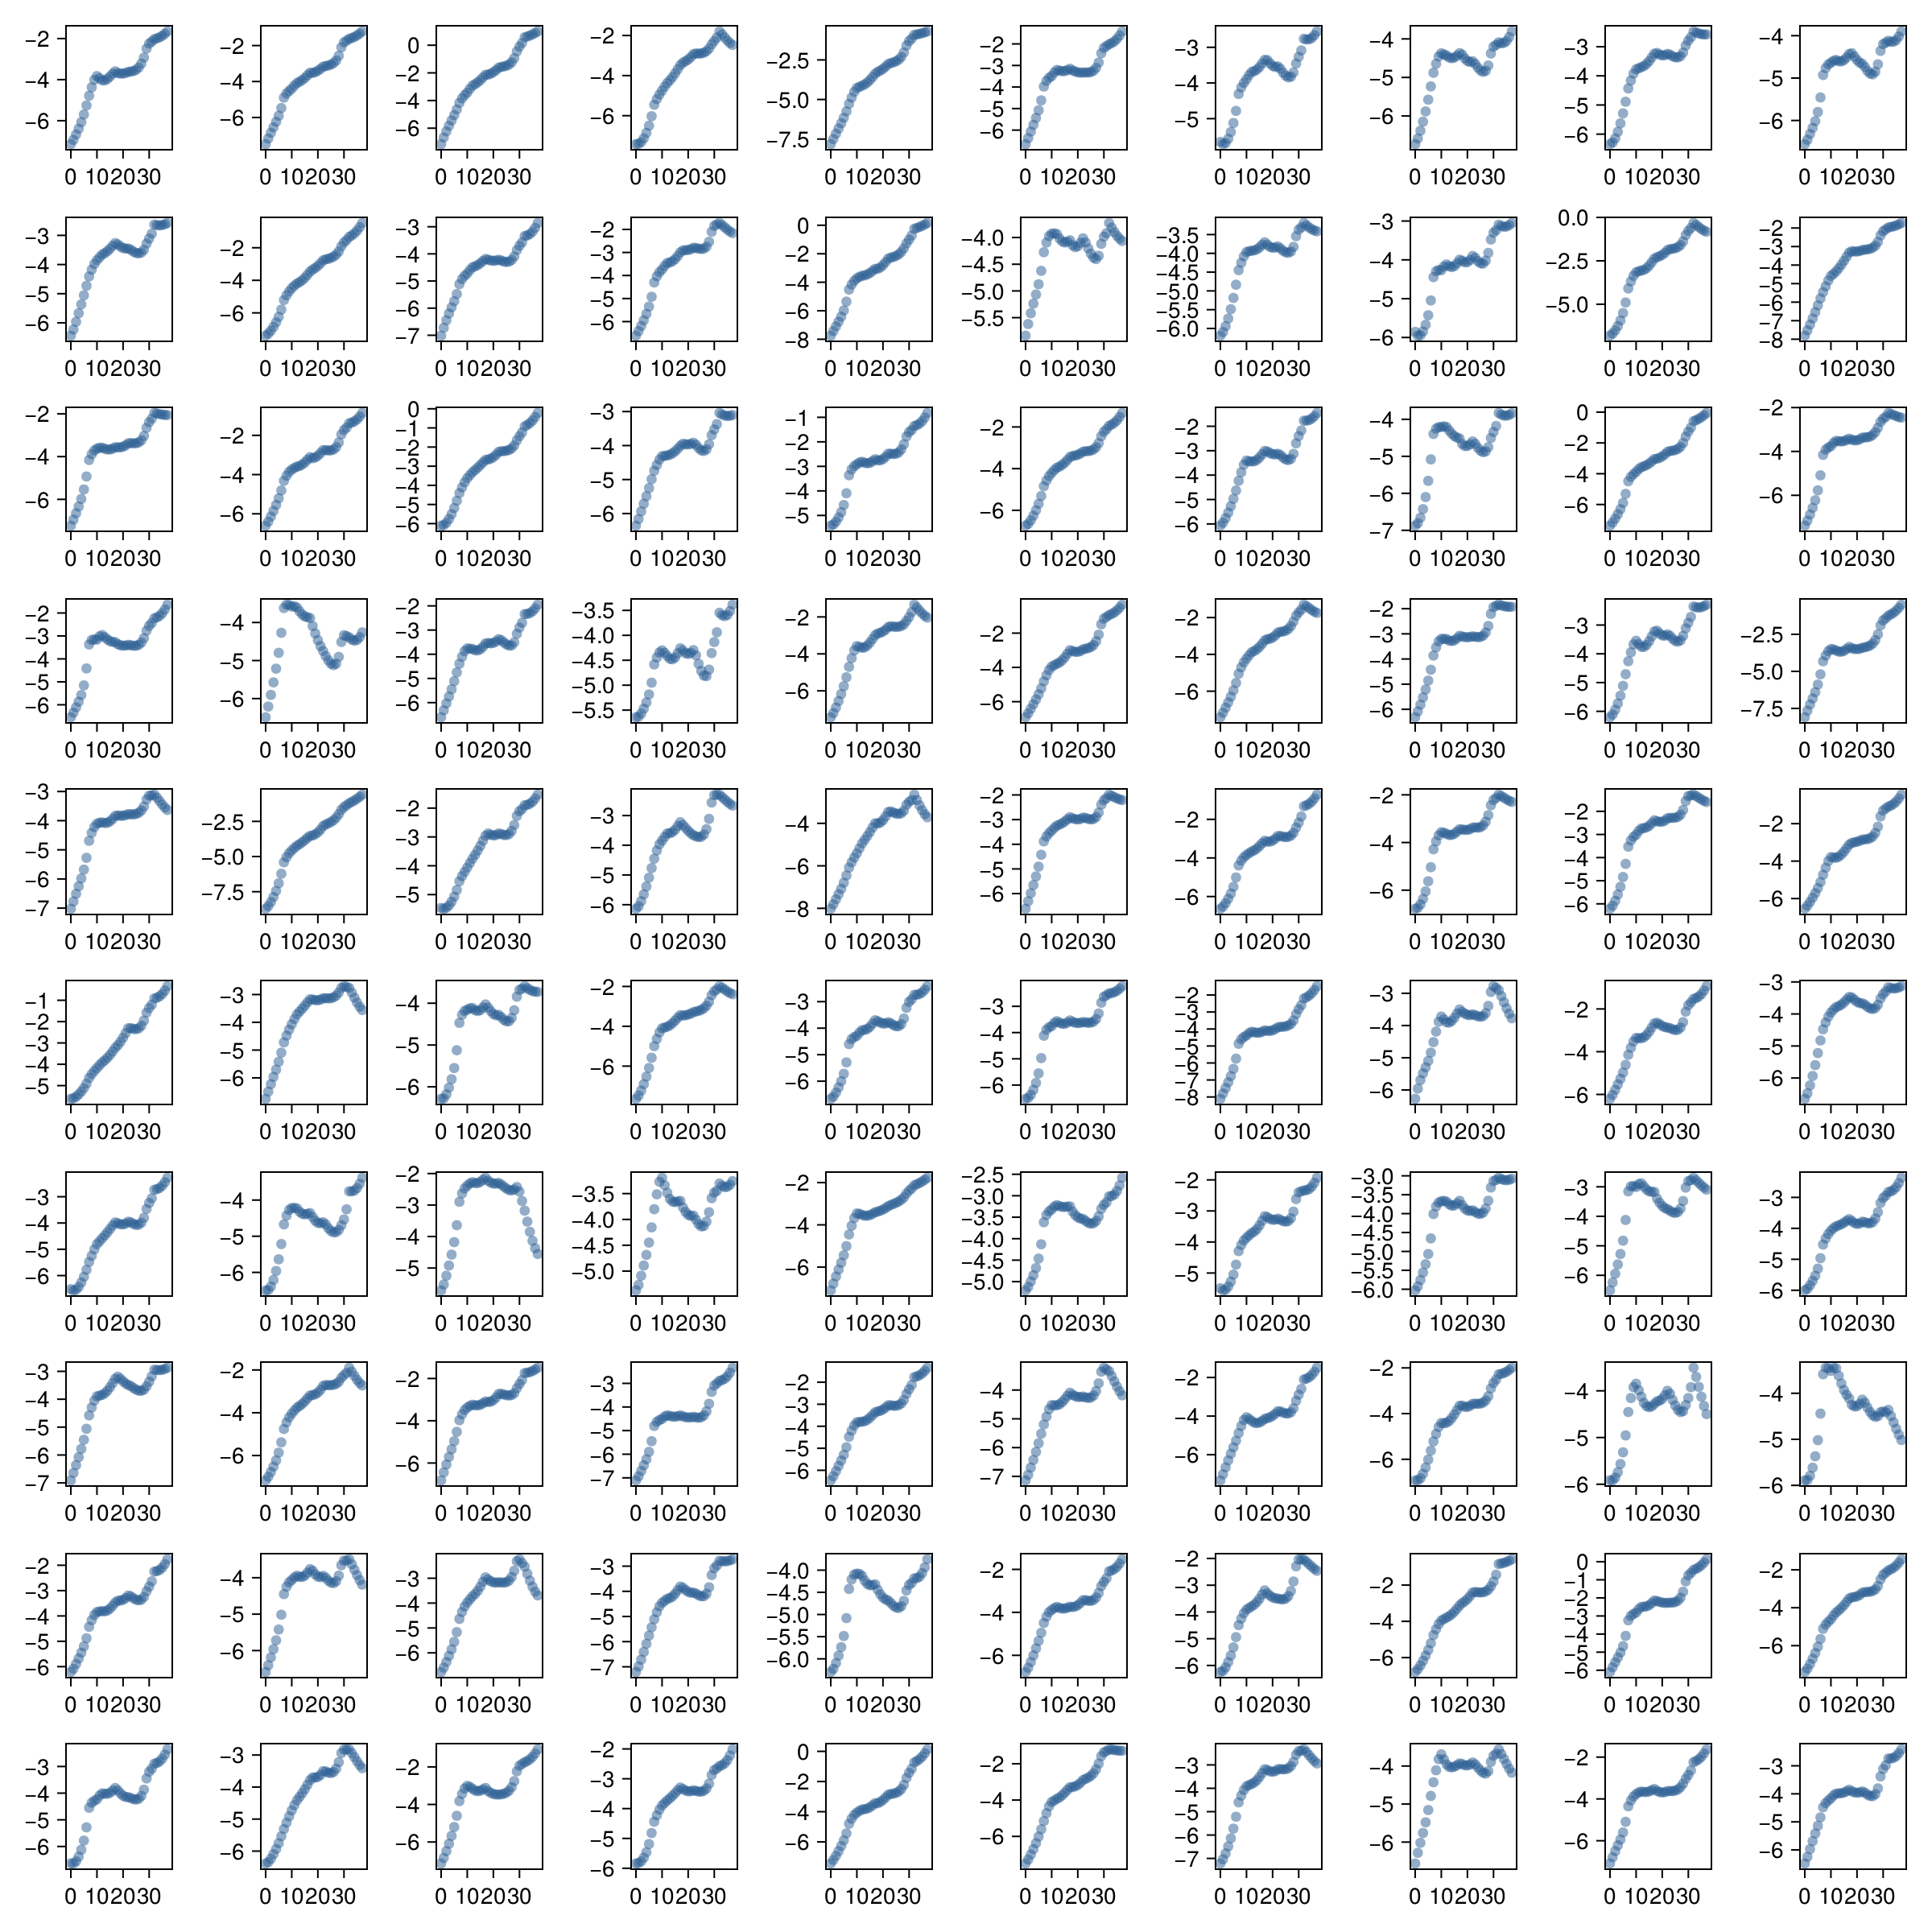

In [18]:
f2 = Figure(size = (1200, 1200));
for i in 1:N 
    αij = [all_ℵij_sum[t][i] for t in 1:num_temps]
    ax2 = Axis(f2[Int(floor((i-1)/10+1)),Int((i-1) % 10+1)], ygridvisible = false, xgridvisible = false)
    scatter!(ax2, Temp_rich, log.(abs.(αij)), color = "#285C93", alpha = 0.5)
end 
display(f2);